<a href="https://colab.research.google.com/github/hatchdavid1/tensorflow_notes_tests/blob/main/GPT_2_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model = GPT2LMHeadModel.from_pretrained('gpt2')
sd_hf = model.state_dict()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [3]:
for k,v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [5]:
sd_hf['transformer.wpe.weight'].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

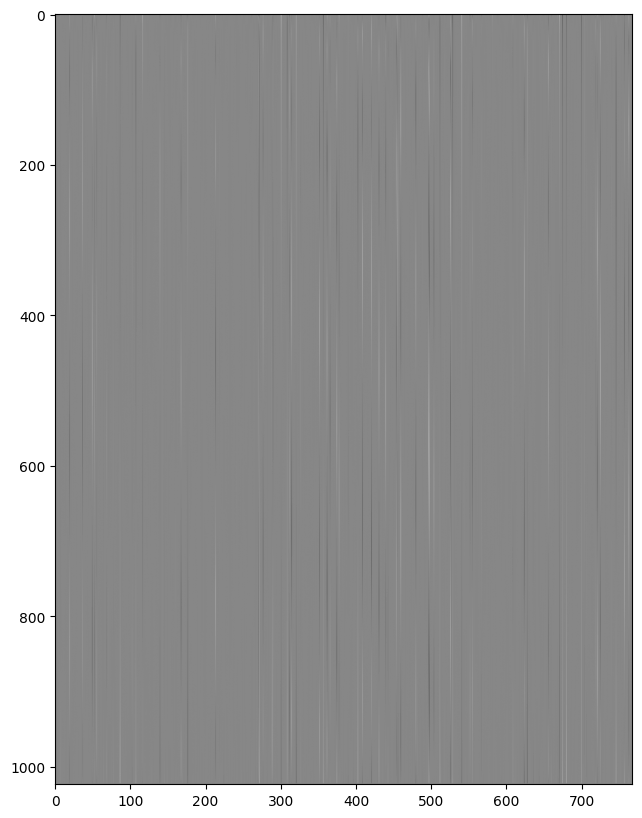

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,10))
plt.imshow(sd_hf['transformer.wpe.weight'], cmap = 'gray')

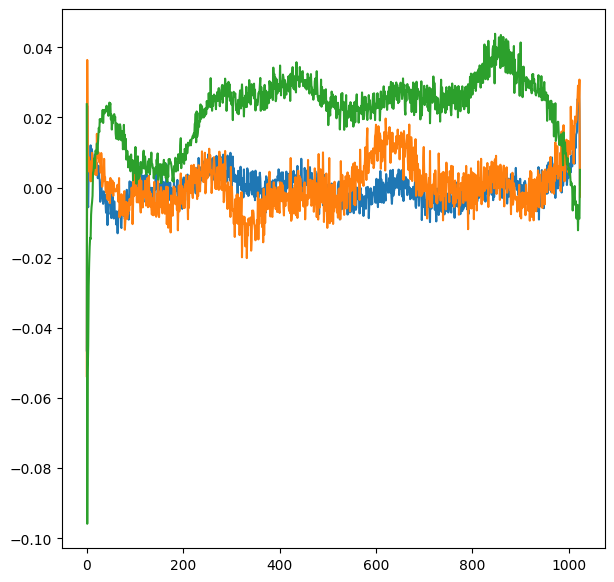

In [10]:
plt.figure(figsize = (7,7))
plt.plot(sd_hf['transformer.wpe.weight'][:,150])
plt.plot(sd_hf['transformer.wpe.weight'][:,200])
plt.plot(sd_hf['transformer.wpe.weight'][:,250])

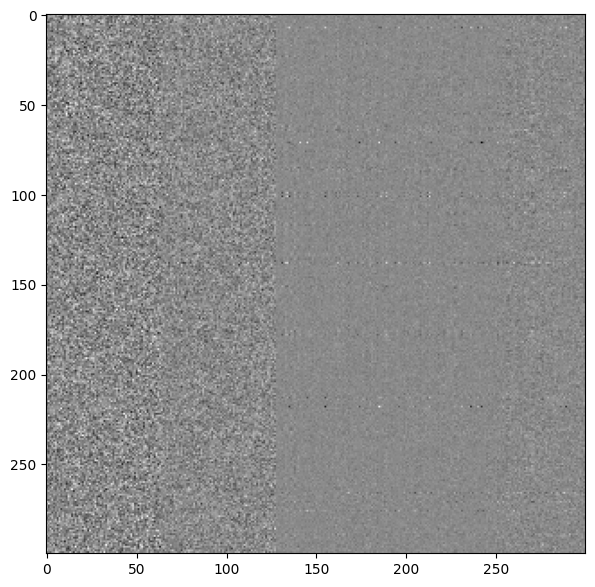

In [15]:
plt.figure(figsize = (7,7))
plt.imshow(sd_hf['transformer.h.1.attn.c_attn.weight'][:300,:300], cmap = 'gray')

In [16]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model = 'gpt2')
set_seed(42)
generator('Hello, I am a language model ', max_length = 30, num_return_sequences = 5)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I am a language model !!\n\nThis way, you can use a model for any type of query that satisfies a query definition.'},
 {'generated_text': 'Hello, I am a language model \xa0in English by T. Balsam. What is most impressive is\xa0 the\xa0 ability \xa0to'},
 {'generated_text': 'Hello, I am a language model " And then he said, "That is correct."\n\nI said, "I am no good at'},
 {'generated_text': "Hello, I am a language model 」 (Celerity)\n\n「Why, you said that I was speaking of the world's strongest"},
 {'generated_text': "Hello, I am a language model \xa0and all languages need a common language. I've made it a goal to write a nice, simple Python"}]